In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('cardio_train.csv',sep=';')

In [44]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [45]:
df.cardio.value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

## Loading Take huge time

In [5]:
# sns.countplot(df['cardio']) 

In [6]:
# sns.countplot(df.cardio)

In [46]:
df.isnull().values.any()

False

In [8]:
# sns.countplot(x = 'gender', hue = 'cardio', data = df, palette = 'colorblind',edgecolor = sns.color_palette('dark',n_colors=1))

In [47]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [48]:
df.age = (df.age/365).round()

In [49]:
df.age

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age, Length: 70000, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df = df.drop(['id'],axis=1)

In [52]:
x = df.iloc[:,:-1]
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.0,2,168,62.0,110,80,1,1,0,0,1
1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,1
69996,62.0,1,158,126.0,140,90,2,2,0,0,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,0
69998,61.0,1,163,72.0,135,80,1,2,0,0,0


In [53]:
y = df.iloc[:,11]
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

## Feature Selection

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [55]:
FIT_FEATURES = SelectKBest(score_func=f_classif)

In [56]:
FIT_FEATURES.fit(x,y)

,score_func,<function f_c...001D464EBA0C0>
,k,10


In [57]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [58]:
SCORE_COL=pd.DataFrame(FIT_FEATURES.scores_,columns=['score value'])
SCORE_COL

,score value
0,4193.661786
1,4.603641
2,8.197397
3,2388.777887
4,208.339524
5,303.629011
6,3599.361137
7,562.772977
8,16.790541
9,3.761355


In [27]:
NAME_COL = pd.DataFrame(x.columns)
NAME_COL

,0
0,age
1,gender
2,height
3,weight
4,ap_hi
5,ap_lo
6,cholesterol
7,gluc
8,smoke
9,alco


In [59]:
top_features = pd.concat([NAME_COL,SCORE_COL],axis=1)

In [60]:
top_features

,0,score value
0,age,4193.661786
1,gender,4.603641
2,height,8.197397
3,weight,2388.777887
4,ap_hi,208.339524
5,ap_lo,303.629011
6,cholesterol,3599.361137
7,gluc,562.772977
8,smoke,16.790541
9,alco,3.761355


In [61]:
top_features.nlargest(10,'score value')

,0,score value
0,age,4193.661786
6,cholesterol,3599.361137
3,weight,2388.777887
7,gluc,562.772977
5,ap_lo,303.629011
4,ap_hi,208.339524
10,active,89.091494
8,smoke,16.790541
2,height,8.197397
1,gender,4.603641


## Feature Importance

In [72]:
from sklearn.ensemble import ExtraTreesClassifier

In [79]:
modelET = ExtraTreesClassifier()

In [80]:
modelET.fit(x,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [81]:
modelET.feature_importances_

array([0.13367913, 0.0063972 , 0.23414724, 0.23615403, 0.19948907,
       0.12126857, 0.04760421, 0.01196587, 0.00458572, 0.00470896])

In [84]:
top = pd.Series(modelET.feature_importances_,index=x.columns)

In [85]:
top

age            0.133679
gender         0.006397
height         0.234147
weight         0.236154
ap_hi          0.199489
ap_lo          0.121269
cholesterol    0.047604
gluc           0.011966
smoke          0.004586
active         0.004709
dtype: float64

<Axes: >

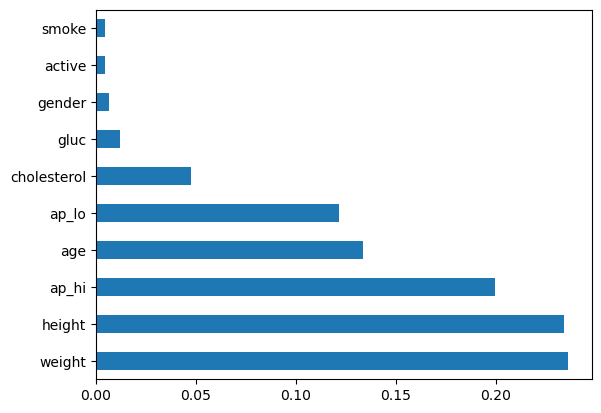

In [89]:
top.nlargest(10).plot(kind='barh')

In [41]:
x.columns

Index(['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'active'],
      dtype='object')

In [62]:
x.drop(columns=['alco'],inplace=True)
x.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'active'],
      dtype='object')

In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [64]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
23561,44.0,2,169,71.0,100,80,1,1,1,1
34858,40.0,1,158,69.0,140,80,2,1,0,1
54953,56.0,1,164,65.0,120,80,1,1,0,1
59230,46.0,1,153,53.0,100,60,1,1,0,1
1730,58.0,1,159,71.0,140,90,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
49100,58.0,2,175,78.0,120,80,1,1,0,1
20609,52.0,1,164,68.0,120,80,1,1,0,0
21440,49.0,2,178,82.0,120,80,1,1,0,1
50057,60.0,1,169,77.0,120,80,1,1,0,0


In [65]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [66]:
model.fit(xtrain,ytrain)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [67]:
model.score(xtest,ytest)

0.7077142857142857

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
clf = DecisionTreeClassifier()

In [70]:
clf.fit(xtrain,ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [71]:
clf.score(xtest,ytest)

0.6282857142857143